Binary Classification
##### Subsidy Inc. delivers to individuals based on their income
Subsidy Inc. wishes us to Develop an income classifier sysytem for individuals

In [397]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [398]:
data_income = pd.read_csv('income.csv')

In [399]:
data = data_income.copy()

In [400]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [402]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [403]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [404]:
col = data.columns
col

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [405]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [406]:
def to_get_uniquevalues_data(df):
    list_cols = [col for col in df.columns]
    for col in list_cols:
        print(col,"->",np.unique(df[col]),"\n")

In [407]:
to_get_uniquevalues_data(data)

age -> [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90] 

JobType -> [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay'] 

EdType -> [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college'] 

maritalstatus -> [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed'] 

occupation -> [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving'] 

relationship 

In [314]:
#list_un_withcol = []
#list_cols = [col for col in data.columns]
#for col in list_cols:
    #for i in np.unique(data[col]):
        #list_un_withcol.append((col,i))
#list_un_withcol

In [315]:
#def Convert(tup, di): 
    #for a, b in tup: 
        #di.setdefault(a, []).append(b) 
    #return di
#new = {} 
#print (Convert(list_un_withcol, new)) 

In [316]:
#for i in new.keys():
    #print(i,"->",new[i],"\n")

In [408]:
data = pd.read_csv('income.csv',na_values=[" ?"])

In [409]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [410]:
data.shape

(31978, 13)

In [411]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [412]:
missing = data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [431]:
data2 = data.dropna(axis=0)

In [432]:
data2.shape

(30162, 13)

In [415]:
data2.describe(include='all')

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
count,30162.000000,30162,30162,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,16,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,"less than or equal to 50,000"
freq,NaN,22286,9840,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [416]:
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [417]:
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [371]:
gender_sal = pd.crosstab(index = data2['gender'],
                        columns = data2['SalStat'],
                         margins = True,
                        normalize = 'index')
gender_sal
#75% people salary is <= 50000

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


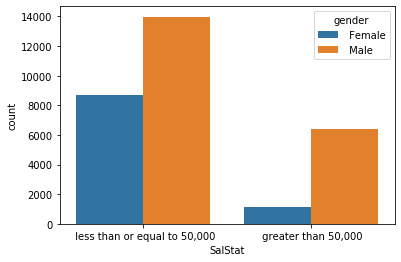

In [328]:
sns.countplot(x = 'SalStat', data = data2, hue='gender')

###### females are more in <=50000 income and males are more in >=50000 income

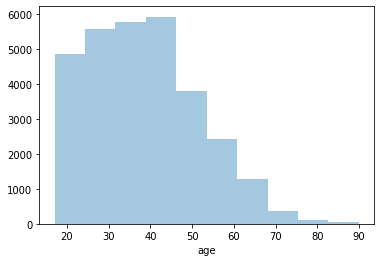

In [329]:
sns.distplot(data2['age'], bins = 10, kde=False)
#people with age b/w 20 to 45 are high in frequence

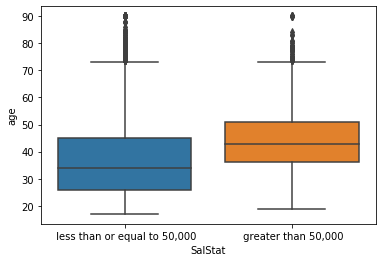

In [330]:
sns.boxplot(x= 'SalStat', y = 'age', data=data2)

In [331]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

###### observation - people with age 35-50 are mre likely to earn more than 50000 USD and people with age 25-35 are mre likely to earn less than 50000 USD

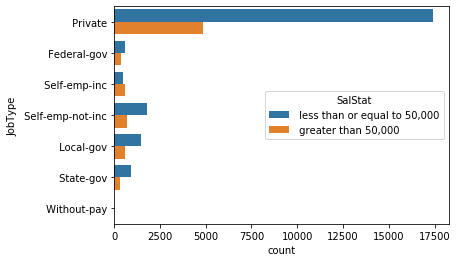

In [332]:
sns.countplot(y = 'JobType', data=data2, hue='SalStat')

In [333]:
Jobtype_sal = pd.crosstab(index = data2['JobType'],
                         columns = data2['SalStat'],
                         normalize = 'index')
Jobtype_sal

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000


###### from above table it is clear that almost 56% people in self_emp_inc are earning more than 50000 USD
Hence it is an important variable in avoiding the misuse of subsidies

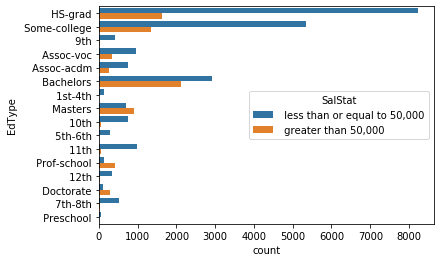

In [334]:
sns.countplot(y = 'EdType', data=data2, hue='SalStat')

In [335]:
Edtype_sal = pd.crosstab(index = data2['EdType'],
                         columns = data2['SalStat'],
                         normalize = 'index')
Edtype_sal

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


###### from above table and chart the people who did doctorate, Masters and Prof-scholl are earning more than 50000 when compared to others
Hence it is an important variable in avoiding the misuse of subsidies

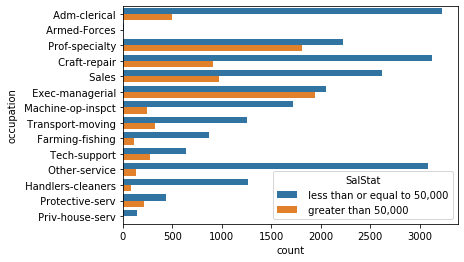

In [336]:
sns.countplot(y = 'occupation', data=data2, hue='SalStat')

In [337]:
occupation = pd.crosstab(index = data2['occupation'],
                         columns = data2['SalStat'],
                         normalize = 'index')
occupation

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


###### the people who works as Executive managerial and professional specialty are earning more
Hence occupation is an important varaible for avoiding misuse of subsidies

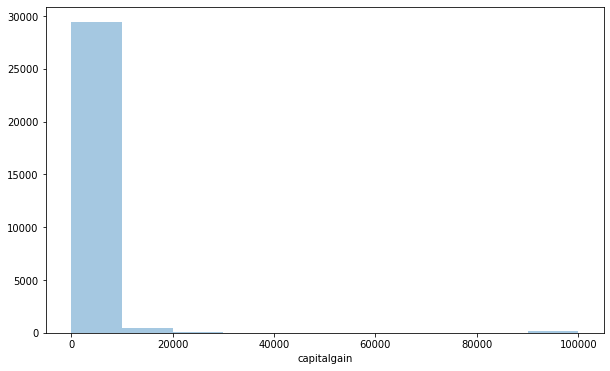

In [338]:
plt.figure(figsize = (10,6))
sns.distplot(data2['capitalgain'], bins=10, kde=False)
#92%(27611) of the capital gain is 0

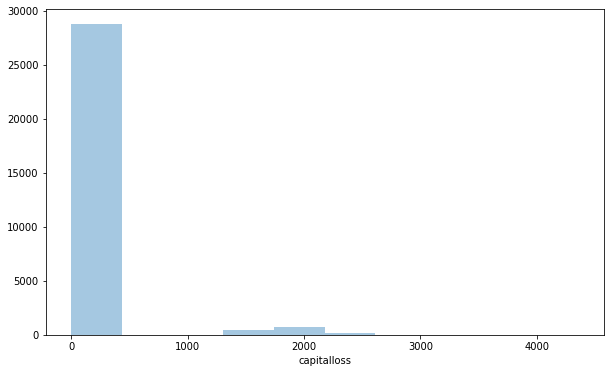

In [339]:
plt.figure(figsize = (10,6))
sns.distplot(data2['capitalloss'], bins =10,kde=False)
#95%(28721) of the capital loss is 0

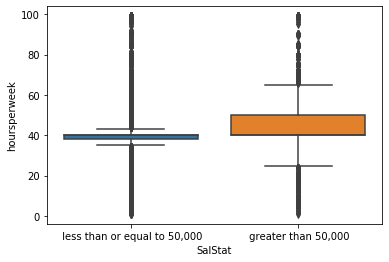

In [340]:
sns.boxplot(x='SalStat', y = 'hoursperweek', data=data2)

###### from the plot it is clear visible that those who works on avg of 40-50 hrs per week are earning more than 50000 USD

In [433]:
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [434]:
new_data = data2.drop(['maritalstatus', 'relationship', 'race', 'nativecountry'], axis=1)
new_data

,age,JobType,EdType,occupation,gender,capitalgain,capitalloss,hoursperweek,SalStat
0,45,Private,HS-grad,Adm-clerical,Female,0,0,28,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Armed-Forces,Male,0,0,40,"less than or equal to 50,000"
2,44,Private,Some-college,Prof-specialty,Male,0,0,40,"greater than 50,000"
3,27,Private,9th,Craft-repair,Male,0,0,40,"less than or equal to 50,000"
4,20,Private,Some-college,Sales,Male,0,0,35,"less than or equal to 50,000"
5,44,Private,HS-grad,Exec-managerial,Female,0,0,40,"less than or equal to 50,000"
6,51,Private,HS-grad,Craft-repair,Male,0,0,40,"less than or equal to 50,000"
7,20,Private,HS-grad,Machine-op-inspct,Male,0,0,40,"less than or equal to 50,000"
9,19,Private,HS-grad,Machine-op-inspct,Female,0,0,40,"less than or equal to 50,000"
10,45,Self-emp-inc,Some-college,Craft-repair,Male,0,0,55,"greater than 50,000"


In [435]:
new_data['SalStat'] = new_data['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [436]:
new_data1 = pd.get_dummies(new_data, drop_first = True)

In [437]:
new_data1.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,gender_ Male
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [438]:
columns_list = list(new_data1.columns)

In [439]:
features = list(set(columns_list)-set('SalStat'))

In [440]:
X = new_data1[features].values

In [441]:
y = new_data1['SalStat'].values

In [442]:
from sklearn.model_selection import train_test_split

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [444]:
from sklearn.linear_model import LogisticRegression

In [445]:
logistic = LogisticRegression()

In [446]:
logistic.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [447]:
logistic.coef_

array([[-6.68892796e-02, -4.68204888e-02, -5.58567647e-01,
        -6.39872088e-02,  1.78357234e-02,  3.91249296e-02,
         1.48180610e-02, -1.21380836e-02, -1.06667436e+00,
        -1.22773362e-01, -1.17073865e-01,  2.36813270e-01,
         9.82339971e-05, -4.85697817e-01,  1.73275494e-01,
        -4.41635495e-01,  2.12196427e-01, -4.88281753e-01,
        -5.35223455e-01, -1.85688774e-01, -5.13485838e-02,
        -3.10868844e-02, -5.70793634e-01, -1.86964659e-01,
        -2.97804572e-01,  1.88119523e-01, -8.69920040e-01,
        -2.33705921e-02, -8.50818739e-02,  3.97877792e-01,
        -2.17075842e-02, -4.85818918e-01,  2.89557600e-04,
        -1.88105731e-01, -2.38732258e-02, -2.07158938e-01,
        -7.39179485e-03,  1.04169202e+01, -1.42456531e-01,
        -2.37294083e-01]])

In [448]:
logistic.intercept_

array([-2.72315519])

In [449]:
prediction = logistic.predict(X_test)

In [450]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [451]:
print(confusion_matrix(y_test, prediction))

[[7472    0]
 [   0 2482]]


In [452]:
print(accuracy_score(y_test, prediction))

1.0


In [453]:
print('misclassified samples: %d' %(y_test != prediction).sum())

misclassified samples: 0


##### KNN

In [460]:
from sklearn.neighbors import KNeighborsClassifier

In [464]:
knn = KNeighborsClassifier(n_neighbors=5)

In [465]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [466]:
knn_prediction = knn.predict(X_test)

In [467]:
print(confusion_matrix(y_test, prediction))

[[7472    0]
 [   0 2482]]


In [468]:
print(accuracy_score(y_test, prediction))

1.0


In [469]:
print('misclassified samples: %d' %(y_test != prediction).sum())

misclassified samples: 0
